<a href="https://colab.research.google.com/github/Ritik1507/Book-Recommendation/blob/main/book_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Book** **Recommendation** **system**

In [30]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## creating the data set

In [31]:
dataset = pd.read_csv("books.csv",on_bad_lines='skip')
dataset.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


checking for missing data


In [32]:
dataset.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

data description

In [33]:
dataset.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


### visualising the data

<ipython-input-34-da1e2c7c1d79>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='average_rating', ylabel='title'>

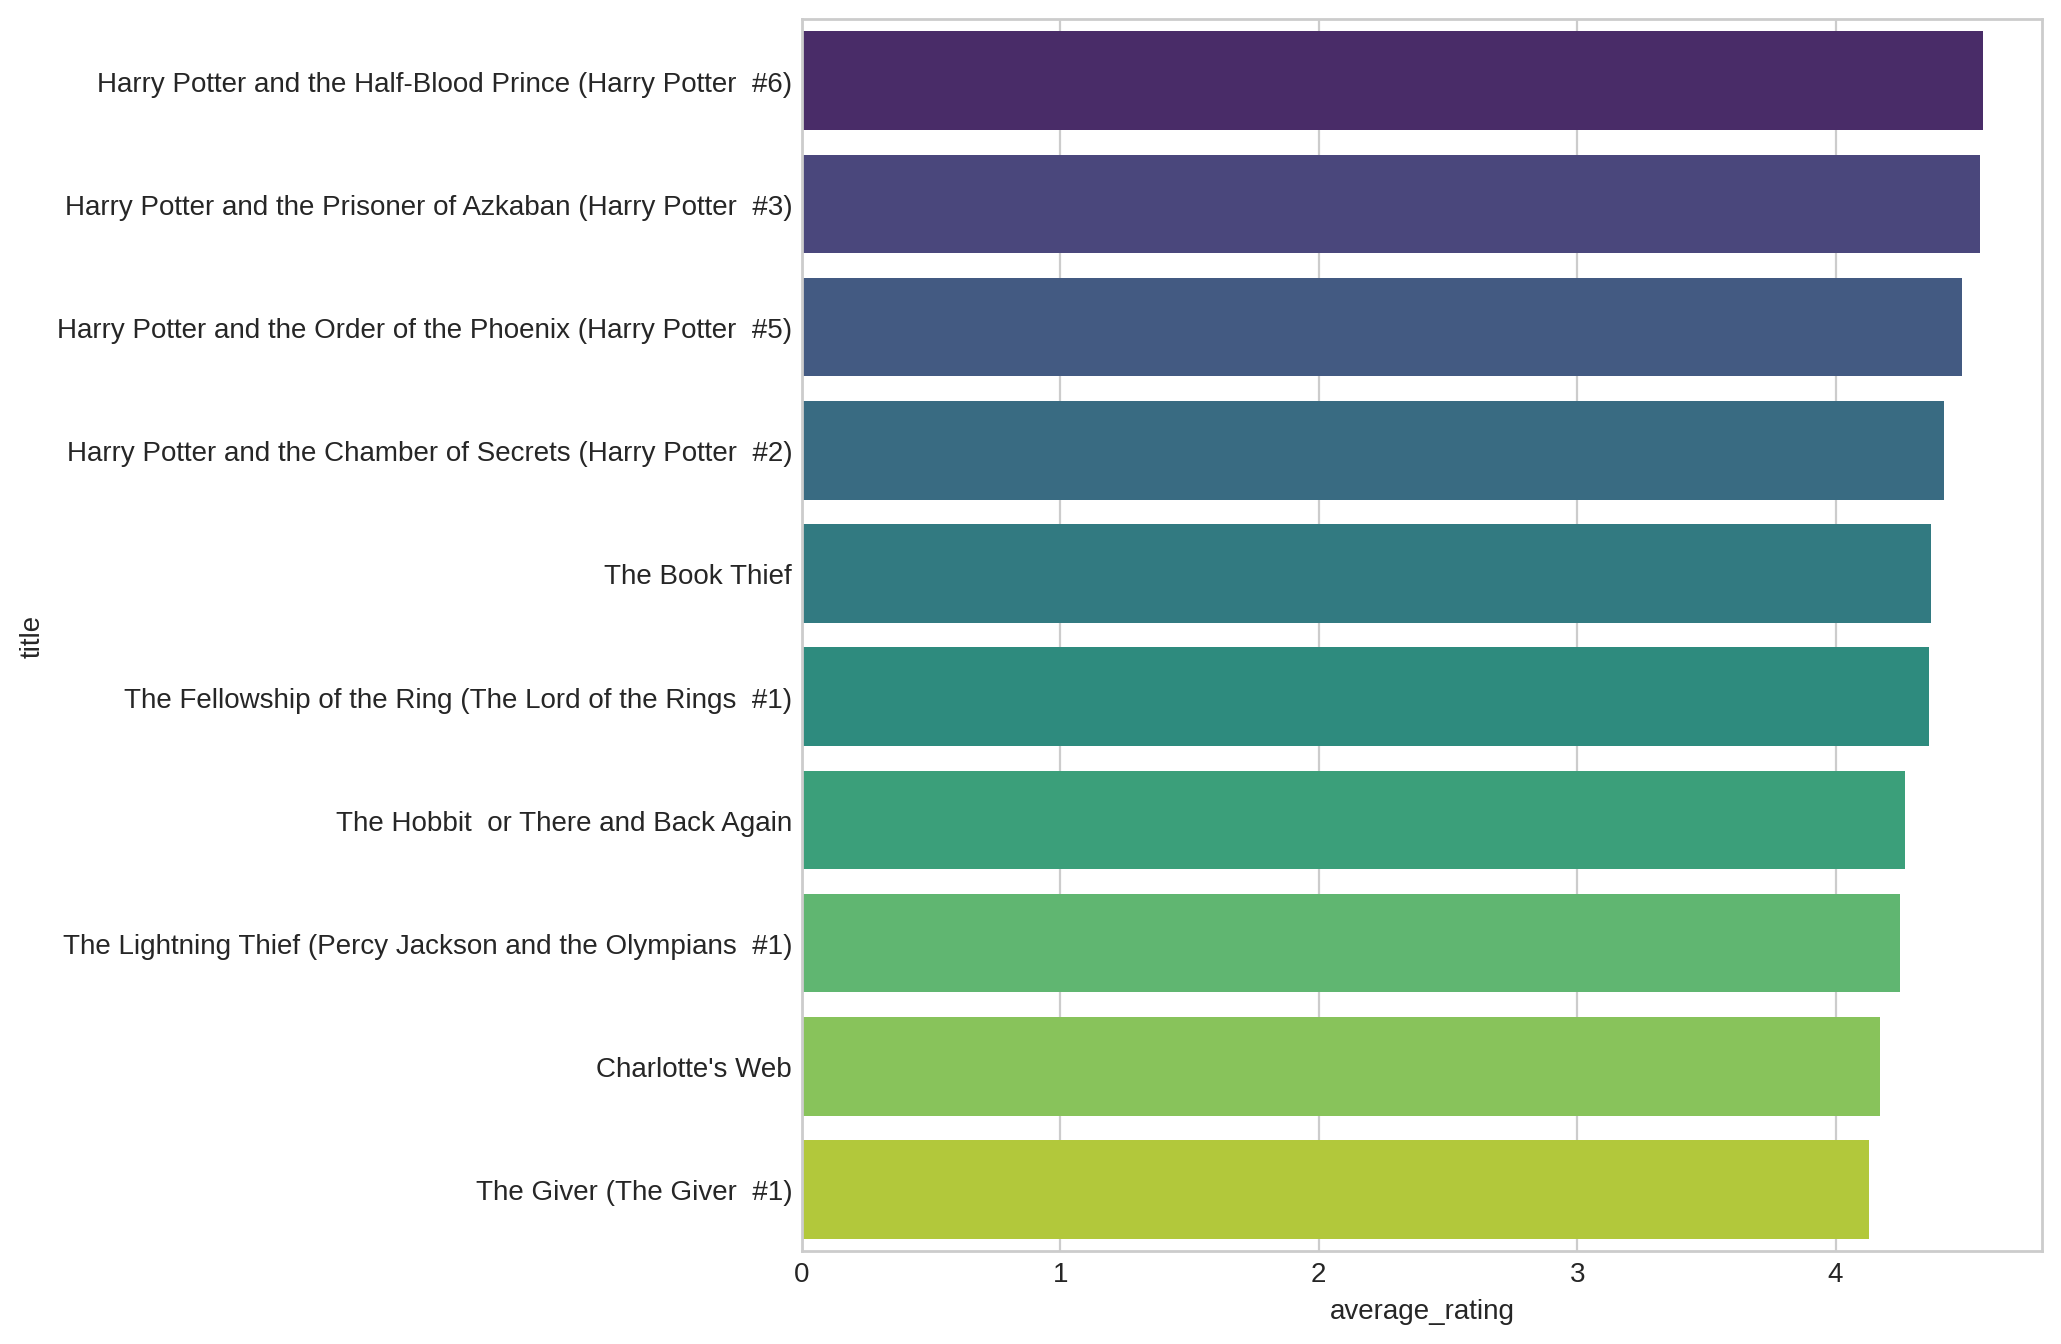

In [34]:
import seaborn as sns
best = dataset[dataset['ratings_count']>1000000]
best.sort_values(by='average_rating',ascending=False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,8),dpi=200)
data = best.sort_values(by='average_rating',ascending=False).head(10)
sns.barplot(x="average_rating",y = "title",data=data, palette='viridis')

Top authors in our data

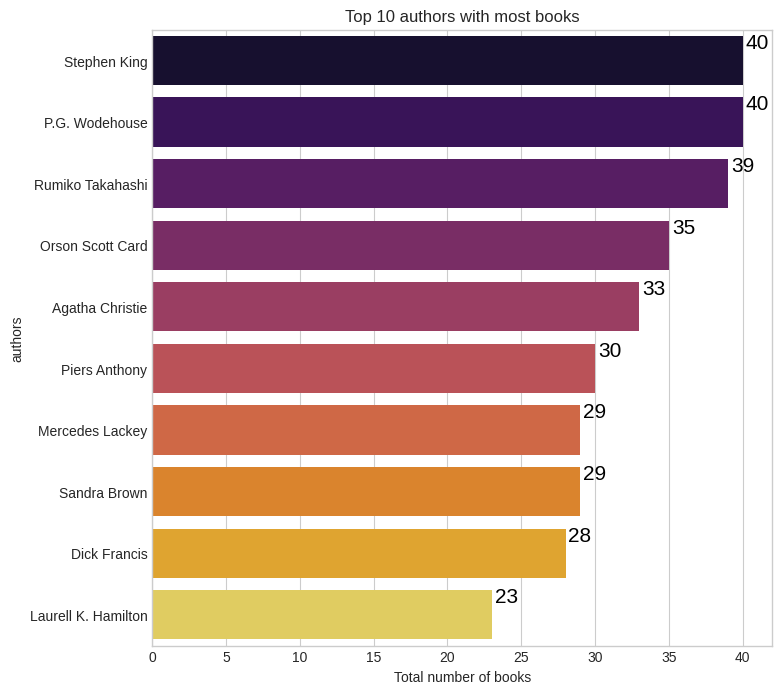

In [35]:
best_authors=dataset.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.figure(figsize =(8,8))
axis = sns.barplot(x=best_authors['title'],y=best_authors.index,palette='inferno')
axis.set_title("Top 10 authors with most books")
axis.set_xlabel("Total number of books")
subtotal = []

for i in axis.patches:
  subtotal.append(i.get_width())
subtotal = sum(subtotal)

for i in axis.patches:
  axis.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

visualisation of most rated books

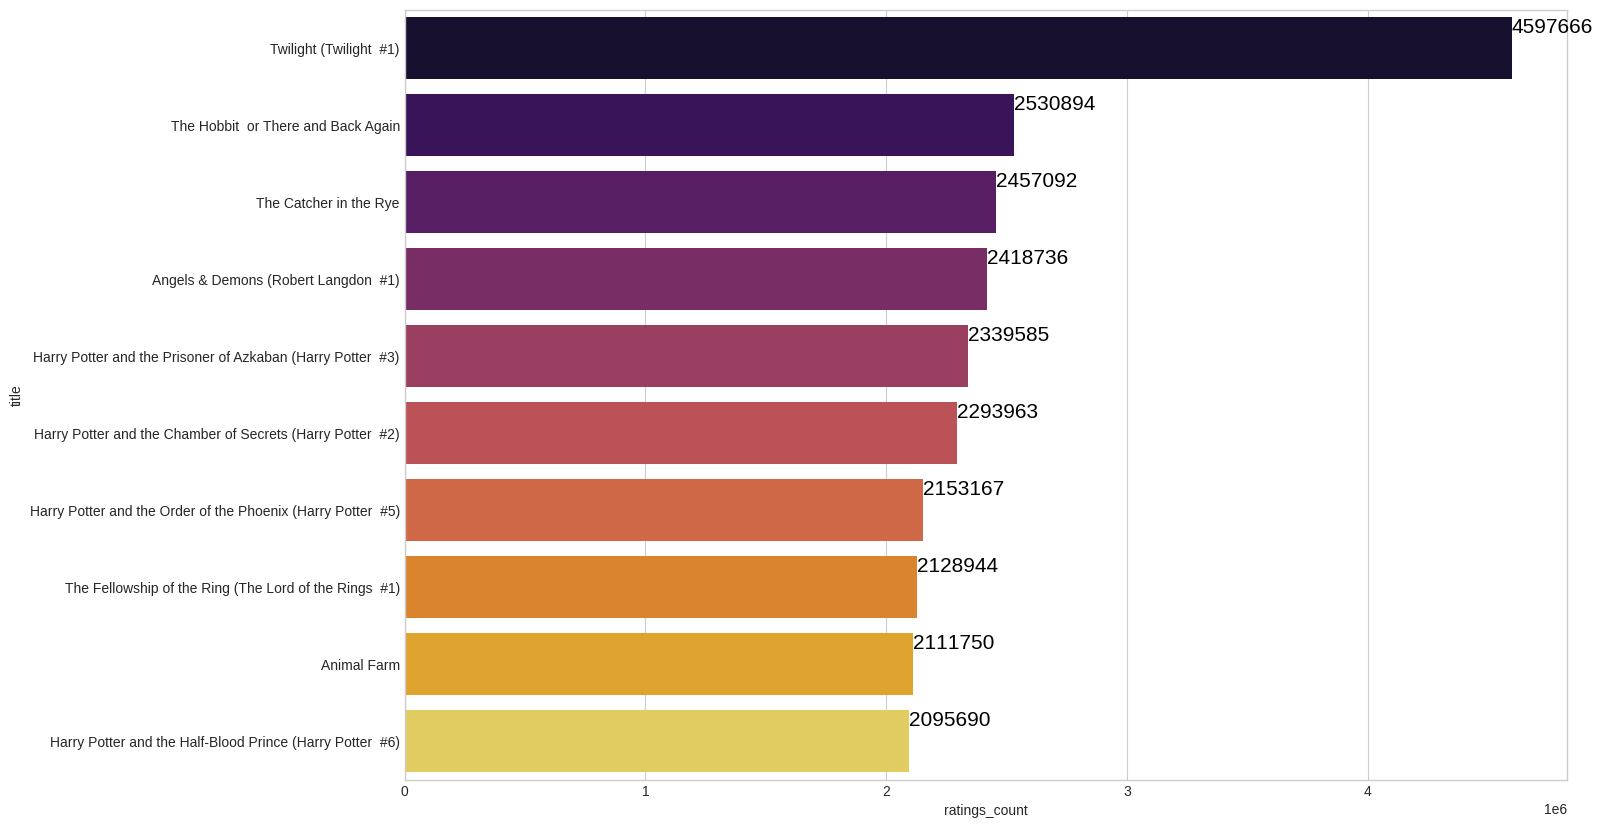

In [36]:

most_rated = dataset.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_rated['ratings_count'],y = most_rated.index, palette = 'inferno')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

average rating distribution of all books

<ipython-input-37-35e15eacd5ab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['average_rating'],ax=axis)


Text(0.5, 23.999999999999993, 'Average rating')

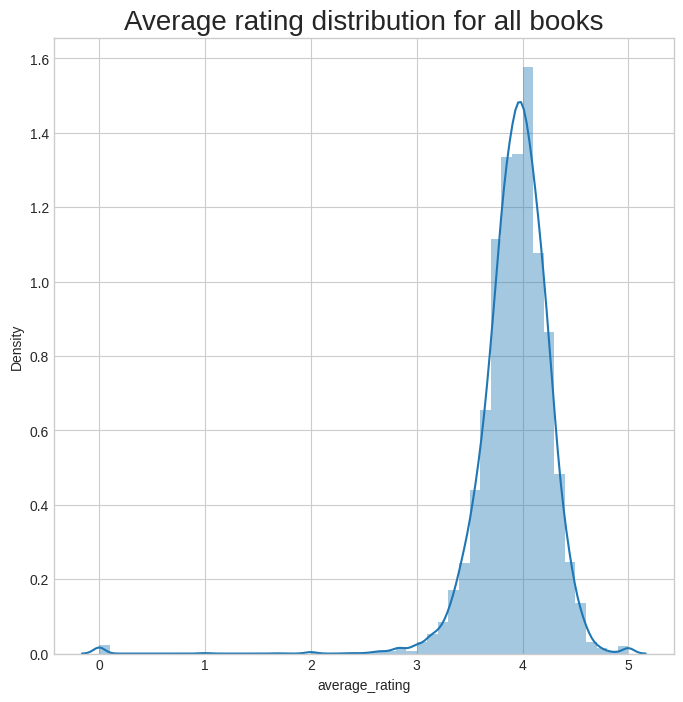

In [37]:
dataset.average_rating = dataset.average_rating.astype(float)
fig, axis = plt.subplots(figsize=[8,8])
sns.distplot(dataset['average_rating'],ax=axis)
axis.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

### relation between different attribute

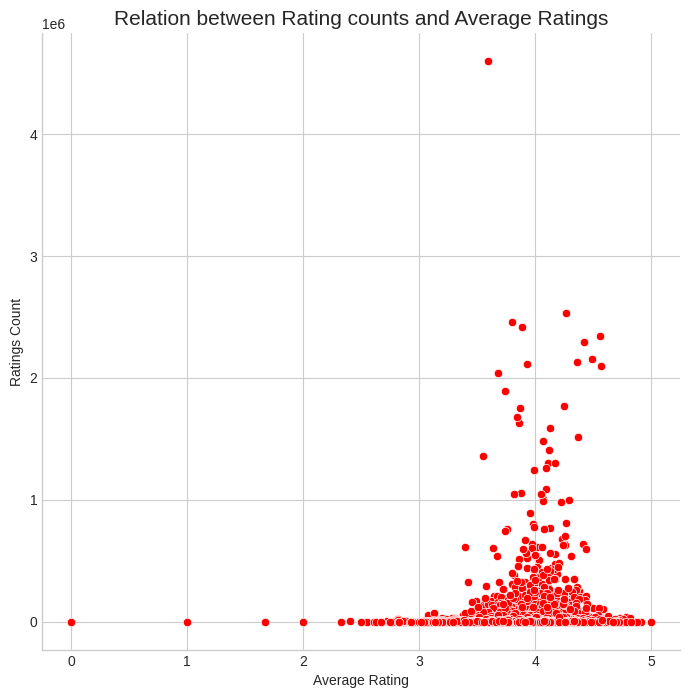

In [38]:
#relation between rating counts and averge rating
axis = sns.relplot(data=dataset, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
axis.set_axis_labels("Average Rating", "Ratings Count")

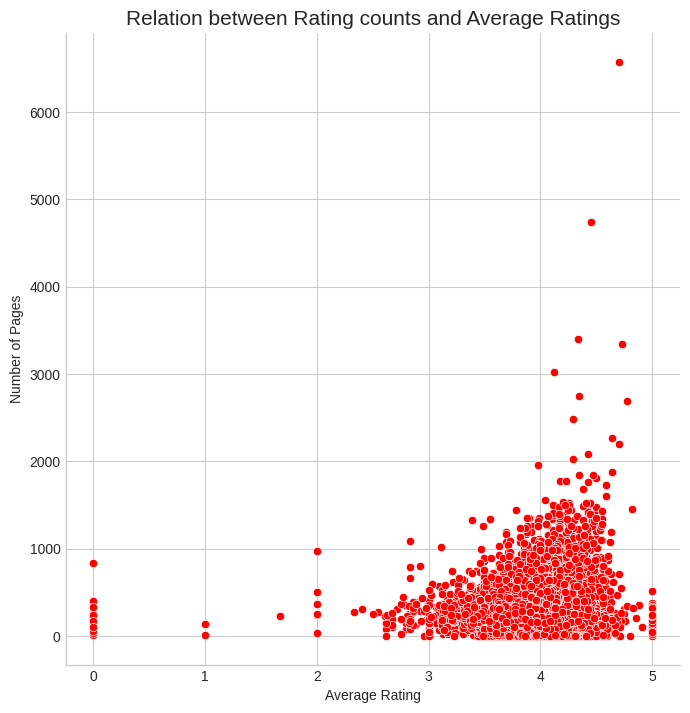

In [39]:
#relation between average rating and number of pages

axis = sns.relplot(data=dataset, x="average_rating", y="  num_pages", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
axis.set_axis_labels("Average Rating", "Number of Pages")

data preparation

In [40]:
df = dataset.copy()

creating rating between

In [41]:

df.loc[ (df['average_rating'] >= 0) & (df['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df.loc[ (df['average_rating'] > 1) & (df['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df.loc[ (df['average_rating'] > 2) & (df['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df.loc[ (df['average_rating'] > 3) & (df['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df.loc[ (df['average_rating'] > 4) & (df['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [42]:
rating_dataset = pd.get_dummies(df['rating_between'])
lang_dataset = pd.get_dummies(df['language_code'])

In [43]:
feature = pd.concat([rating_dataset,lang_dataset,df['average_rating'],df['ratings_count']],axis =1)

preprocessing

In [44]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
feature = mms.fit_transform(feature)

In [45]:


from sklearn import neighbors
model =  neighbors.NearestNeighbors(n_neighbors=6,algorithm='ball_tree')
model.fit(feature)
dist,idlist = model.kneighbors(feature)

In [49]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.loc[newid].title)
    return book_list_name

BookNames = BookRecommender('In a Sunburned Country')
BookNames

['In a Sunburned Country',
 'Rosencrantz and Guildenstern Are Dead',
 'Song of Solomon',
 "4th of July (Women's Murder Club  #4)",
 'The Trumpet of the Swan',
 'The Once and Future King (The Once and Future King  #1-4)']